In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

/Users/jklee/Research/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (6538,) int32
file_names <type 'numpy.ndarray'> (1356,) <U51
features <type 'numpy.ndarray'> (1356, 196, 512) float32
captions <type 'numpy.ndarray'> (6538, 17) int32
Elapse time: 0.68


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [4]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-6',
                                 print_bleu=False, log_path='./log/')

INFO:tensorflow:Restoring parameters from ./model/lstm/model-6
> /Users/jklee/Research/second/second_sat/core/solver.py(208)test()
-> if attention_visualization:
(Pdb) c
Sampled Caption: a table with a plate of food and a cup of coffee .


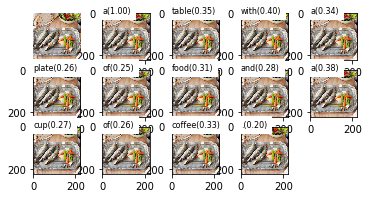

In [8]:
solver.test(data, split='val')

In [9]:
test = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (6538,) int32
file_names <type 'numpy.ndarray'> (1348,) <U51
features <type 'numpy.ndarray'> (1348, 196, 512) float32
captions <type 'numpy.ndarray'> (6538, 17) int32
Elapse time: 0.75


INFO:tensorflow:Restoring parameters from ./model/lstm/model-6
> /Users/jklee/Research/second/second_sat/core/solver.py(208)test()
-> if attention_visualization:
(Pdb) c
Sampled Caption: a group of people sitting around a table with wine glasses .


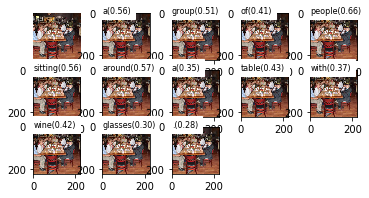

In [10]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [11]:
evaluate(data_path='./data', split='val')

{'reflen': 14505, 'guess': [14622, 13266, 11910, 10554], 'testlen': 14622, 'correct': [9413, 3768, 1517, 674]}
ratio: 1.00806618407
Bleu_1:	0.643755984133
Bleu_2:	0.427608264298
Bleu_3:	0.285576193077
Bleu_4:	0.196382236448
METEOR:	0.204338786746
ROUGE_L: 0.5041970846119473
CIDEr:	0.6131156501439032


In [12]:
evaluate(data_path='./data', split='test')

IOError: [Errno 2] No such file or directory: './data/test/test.candidate.captions.pkl'